온도별 모기채집량 분석 모델

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gettempdata as gt
import getmosdata as gm
import getraindata as gr
import seaborn as sns
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

데이터 전처리

In [2]:
temp=gt.get_temp_data()
temp.tempinfo()
avgtempdata=temp.avgtemp
maxtempdata=temp.maxtemp
mintempdata=temp.mintemp
mos = gm.get_mos_data()
mos.mosinfo()
mosdata = mos.mos
rain = gr.get_rain_data()
rain.raininfo()
raindata=rain.precipitation

In [4]:
k=np.zeros(209)
k=np.where(k==0,'2019','')
data= mosdata['2019']
d2019=pd.DataFrame({"mos": data, "year":k})
k=np.zeros(209)
k=np.where(k==0,'2018','')
data= mosdata['2018']
d2018=pd.DataFrame({"mos": data, "year":k})
k=np.zeros(209)
k=np.where(k==0,'2017','')
data= mosdata['2017']
d2017=pd.DataFrame({"mos": data, "year":k})
k=np.zeros(209)
k=np.where(k==0,'2016','')
data= mosdata['2016']
d2016=pd.DataFrame({"mos": data, "year":k})
k=np.zeros(209)
k=np.where(k==0,'2015','')
data= mosdata['2015']
d2015=pd.DataFrame({"mos": data, "year":k})
smosdata=pd.concat([d2019,d2018,d2017,d2016,d2015])


data= avgtempdata['2019'][96:-61]
t2019=pd.DataFrame({"temp": data})
data= avgtempdata['2018'][96:-61]
t2018=pd.DataFrame({"temp": data})
data= avgtempdata['2017'][96:-61]
t2017=pd.DataFrame({"temp": data})
data= avgtempdata['2016'][96:-61]
t2016=pd.DataFrame({"temp": data})
data= avgtempdata['2015'][96:-61]
t2015=pd.DataFrame({"temp": data})
savgtempdata=pd.concat([t2019,t2018,t2017,t2016,t2015])

data= raindata['2019'][96:-61]
r2019=pd.DataFrame({"rain": data})
data= raindata['2018'][96:-61]
r2018=pd.DataFrame({"rain": data})
data= raindata['2017'][96:-61]
r2017=pd.DataFrame({"rain": data})
data= raindata['2016'][96:-61]
r2016=pd.DataFrame({"rain": data})
data= raindata['2015'][96:-61]
r2015=pd.DataFrame({"rain": data})
sraindata=pd.concat([r2019,r2018,r2017,r2016,r2015])

data=pd.concat([savgtempdata,smosdata,sraindata],axis=1)

In [5]:
datana=data.dropna()
mos=np.array(datana['mos']).reshape(-1,1)
temp=np.array(datana['temp']).reshape(-1,1)

훈련세트 테스트세트 7대3비율 설정

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(temp,mos,train_size=0.7,test_size=0.3,random_state=1)
Xtrain=np.array(Xtrain).reshape(-1,1)
ytrain=np.array(ytrain).reshape(-1,1)
Xtest=np.array(Xtest).reshape(-1,1)
ytest=np.array(ytest).reshape(-1,1)

훈련세트 그래프

X.shape :  (690, 1) 
y.shape :  (690, 1)


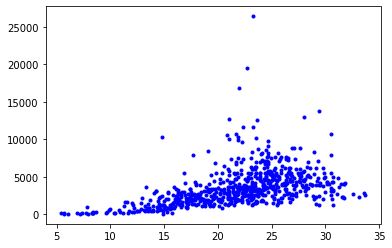

In [9]:
print('X.shape : ', Xtrain.shape, '\ny.shape : ', ytrain.shape)
plt.plot(Xtrain, ytrain, "b.")
plt.show()

In [10]:
def PolynomialRegression(degree=2, **kwargs):
 return make_pipeline(PolynomialFeatures(degree),
 LinearRegression(**kwargs))

In [11]:
X_test = np.linspace(1,40, 500).reshape(-1,1)
X_test.shape

(500, 1)

선형회귀분석 degree별 모델 그래프

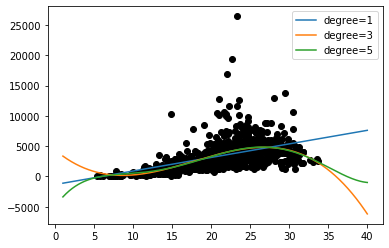

In [12]:
plt.scatter(Xtrain.ravel(), ytrain, color='black')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(Xtrain, ytrain).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.legend(loc='best')
plt.show()

각 degree별 검증곡선

Text(0, 0.5, 'score')

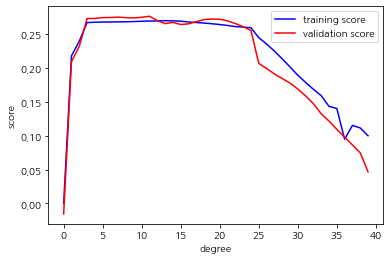

In [36]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 40)
train_score, val_score = validation_curve(PolynomialRegression(),
                                          Xtrain,ytrain,'polynomialfeatures__degree'
                                         ,degree)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')

검증 곡선을 통해 모델의 degree를 4로 결정 모델

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\ma

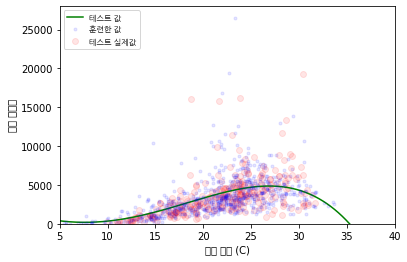

In [13]:
pmodel=PolynomialRegression(4)
pmodel.fit(Xtrain, ytrain)
y_test = pmodel.predict(X_test)
plt.plot(X_test.ravel(), y_test,color='g' ,label='테스트 값'.format(11))
plt.rc('font', family='NanumGothic')
plt.scatter(Xtest,ytest,color='r',alpha=0.1,label="테스트 실제값")
plt.plot(Xtrain, ytrain, "b.",alpha=0.1,label="훈련한 값")
plt.legend(loc='upper left',fontsize=8)
plt.ylim(-0.1,28000)
plt.xlim(5,40)
plt.ylabel("모기 채집량")
plt.xlabel("평균 기온 (C)")
plt.show()

모델 정확도

In [14]:
print("훈련 세트 정확도: {:.3f}".format(pmodel.score(Xtrain, ytrain)))
print("테스트 세트 정확도: {:.3f}".format(pmodel.score(Xtest, ytest)))

훈련 세트 정확도: 0.272
테스트 세트 정확도: 0.294
